# Titanic data project

In this notebook the well renowned Titanic dataset will be imported and explored. \
The goal of this project is to achieve high classification accuracy using different sklearn models.

## Importing necessary libraries

Importing libraries relevant for the whole exercise. \
Packages needed for specific usages will be imported in the relevant cells.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing data

In this part we use the already splitted data given in the Madors' exercise, since we want our train-test split to contain the same samples.

In [3]:
path_train = "../data/train.csv"
path_test = "../data/test.csv"
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

Lets take a quick peak at the data

In [4]:
train.head(100)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S
1,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S
2,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
3,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
4,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S
96,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
97,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S
98,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C


## Data Cleaning 

K den, we need to remove irrelevant fields and change the notation of some fields.

In [5]:
# first we remove the features that wont help us, and mostly have missing values.

train.drop(["Cabin", "Ticket"], axis=1, inplace=True)
test.drop(["Cabin", "Ticket"], axis=1, inplace=True)
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,151.5500,S
1,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,12.2750,S
2,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,15.7417,C
3,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,69.5500,S
4,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,10.5000,S


Now lets see how many NaN values we have in the table (should we drop 'em?)

In [6]:
num_of_nan = train.isnull().sum(axis = 0)
print(f"There are {train.shape[0]} entries in the training set.")
num_of_nan

There are 712 entries in the training set.


Survived      0
Pclass        0
Name          0
Sex           0
Age         138
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

* Well, thats kinda sux. we'll have to think what to do with this missing data. 
* Age seems to be somewhat informative so maybe dropping it will be a bad idea. We will do it now anyways as a naive solution \
Idea to try later: train a regression model to predict the age using the other features. \
Also: maybe trying to use last names in order to extract family relations
* There are only 2 missing values in the "Embarked" column so we can just drop it.

In [7]:
train.dropna(subset=["Embarked"], inplace=True)
# Sanity check
num_of_nan = train.isnull().sum(axis = 0)
print(f"There are {train.shape[0]} entries in the training set.")
num_of_nan

There are 710 entries in the training set.


Survived      0
Pclass        0
Name          0
Sex           0
Age         138
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Noice! \
Next we encode categorical features with numerical values 
* "Embarked" will be converted to 1-hot vector after the visualizations.
* We mark female as 0 and male as 1

In [8]:
train["Sex"].replace({"female":0, "male":1}, inplace=True)
test["Sex"].replace({"female":0, "male":1}, inplace=True)
train["Embarked"].replace({"C":0, "S":1, "Q":2}, inplace=True)
test["Embarked"].replace({"C":0, "S":1, "Q":2}, inplace=True)
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,"Cleaver, Miss. Alice",0,22.0,0,0,151.5500,1
1,0,2,"Hunt, Mr. George Henry",1,33.0,0,0,12.2750,1
2,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.0,0,2,15.7417,0
3,0,3,"Sage, Miss. Stella Anna",0,NaN,8,2,69.5500,1
4,0,2,"Mitchell, Mr. Henry Michael",1,70.0,0,0,10.5000,1


Done cleaning for today! \
Time to plot some pretty graphs

Splitting the df to X and y and we are done!

In [9]:
X_train = train.drop(["Survived"], axis=1)
y_train = train["Survived"]
X_test = test.drop(["Survived"], axis=1)
y_test = test["Survived"]

checking whether the data is balanced:


In [10]:
np.sum(y_train)/len(y_train)*100

37.605633802816904

Well, only 37.61% of the people in the training set lived. this is not a balanced dataset, while not being crazy-unbalanced as well. \
Let's keep that in mind for when we train our classifiers...

## Data exploration and visualization

Let's start by trying to get a grasp as to how hard should the data be to seperate, using T-SNE. \
For T-SNE we should first rescale the features in order to ensure they all have the same impact

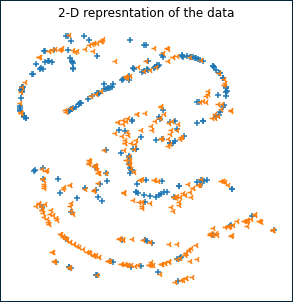

In [11]:
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

train_without_na = train.dropna(subset=["Age"])
X_train_without_na = train_without_na.drop(["Survived","Name"], axis=1)
y_train_without_na = train_without_na["Survived"]

X_normalized = normalize(X_train_without_na)
X_embedded = TSNE(perplexity=14, n_iter=300).fit_transform(X_normalized)
plt.figure(linewidth=2, edgecolor="#04253a", figsize=(5,5))
plt.scatter(X_embedded[y_train_without_na == 1, 0], X_embedded[y_train_without_na == 1, 1], marker='+')
plt.scatter(X_embedded[y_train_without_na == 0, 0], X_embedded[y_train_without_na == 0, 1], marker='3')
plt.axis("off")
plt.title("2-D represntation of the data")
plt.show()

Looks somewhat seperable. Tbh, there is not much to learn from it. 

### Histograms of the contiguous features


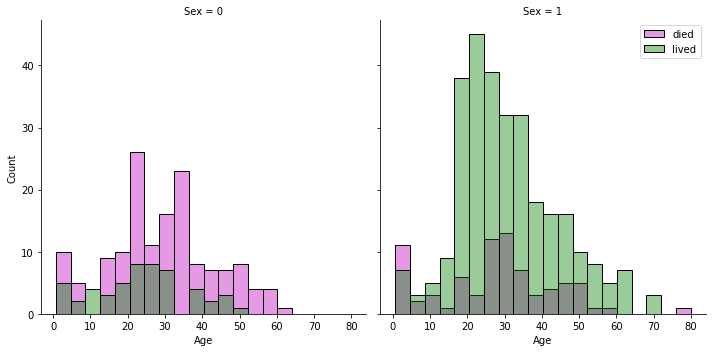

In [12]:
import seaborn as sns


sns.displot(data=train,x="Age",hue="Survived", alpha=0.4,palette=['g','m'],legend=False,col="Sex")
plt.legend(["died", "lived"])
plt.show()

Notice that most of the men who survived are either young kids, or young men - which means they could use physical strength in order to find their way to a boat (maybe?), \
this idea is supported by the fact that men over the age of 50 are extremly likely to end up dead in this case

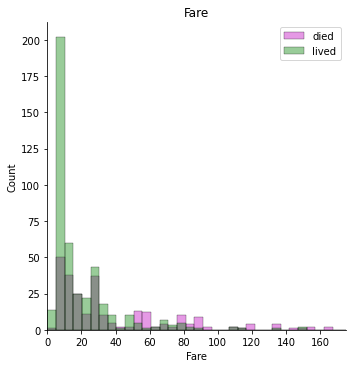

In [13]:
ax = sns.displot(data=train,x="Fare",hue="Survived", alpha=0.4, palette=['g','m'],legend=False)
plt.legend(["died", "lived"])
plt.title("Fare")
ax.set(xlim=(0, 175))
plt.show()

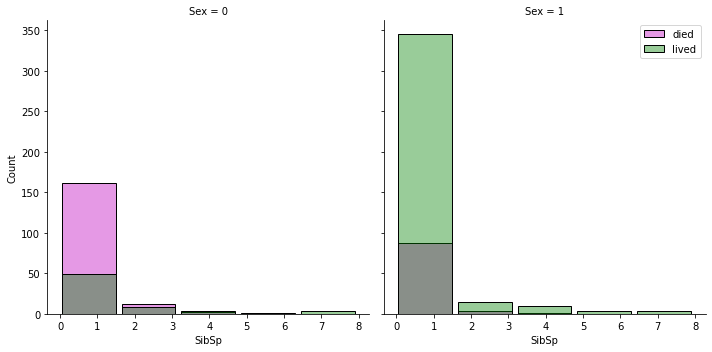

In [14]:
# reminder: SibSp = Number of Siblings/Spouses Aboard
ax = sns.displot(data=train,x="SibSp",hue="Survived", alpha=0.4, palette=['g','m'],legend=False, bins=5,shrink=.9,col="Sex")
plt.legend(["died", "lived"])
plt.show()

This graph results in a nice idea - we can see that whenever a female has more than 1 SibSp member with her on board - she is very likely to live! \
From this graph and the one following 3 features will be constructed:
* Single - if someone is alone onboard
* Lot_Sib - (=Lots of siblings) SibSp>=2
* Lot_Child - (=Lots of children) Parch >= 4

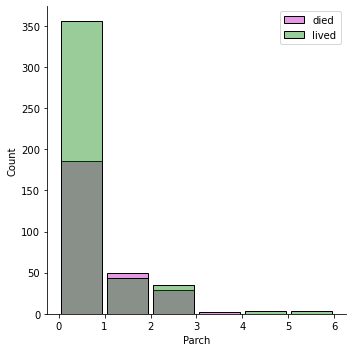

In [15]:
# reminder: Parch = Number of Parents/Children Aboard
ax = sns.displot(data=train,x="Parch",hue="Survived", alpha=0.4, palette=['g','m'],legend=False, bins=6,shrink=.9)
plt.legend(["died", "lived"])
plt.show()

This result is not suprising - it is likely that whoever had children or old parents to take care of had a lower chance of survival

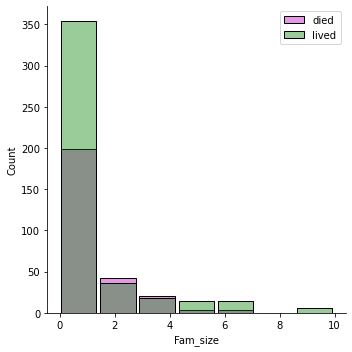

In [16]:
tmp_train = train.copy()
tmp_train["Fam_size"] = tmp_train["SibSp"] + tmp_train["Parch"]
ax = sns.displot(data=tmp_train,x="Fam_size",hue="Survived", alpha=0.4, palette=['g','m'],legend=False, bins=7,shrink=.9)
plt.legend(["died", "lived"])
plt.show()

From the above graph another feature will be constructed: 
* Big_Fam - (=Big family) Fam_Size>=4

### Pair plots
* first, couples of Categorical and Continuous features

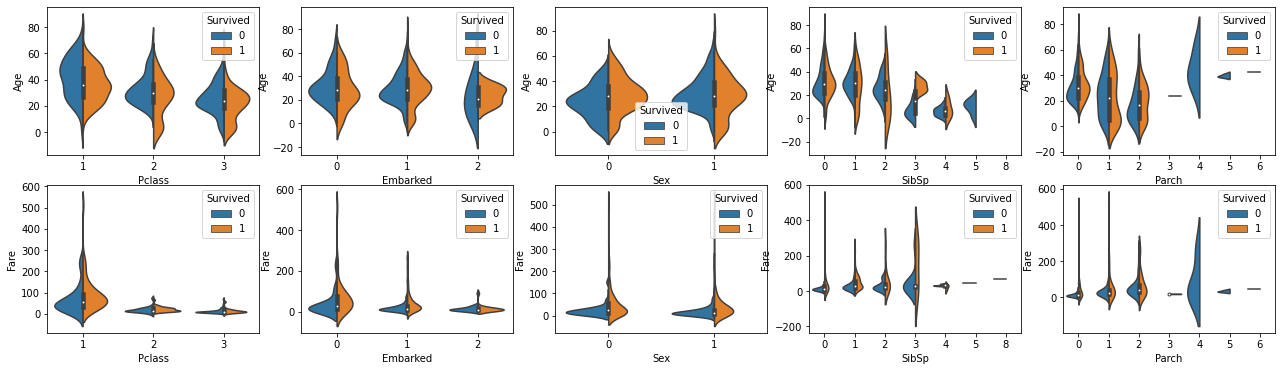

In [17]:
num_vars = ['Age', 'Fare']
cat_vars = ['Pclass', 'Embarked', 'Sex', "SibSp","Parch"]


plt.figure(figsize=(22,6))

for j,cont_variable in enumerate(num_vars):
    for i,cat_variable in enumerate(cat_vars):
        plt.subplot(2,5,i+1+5*j)
        sns.violinplot(x=cat_variable,y=cont_variable, hue="Survived", data=train, split=True)

plt.show()

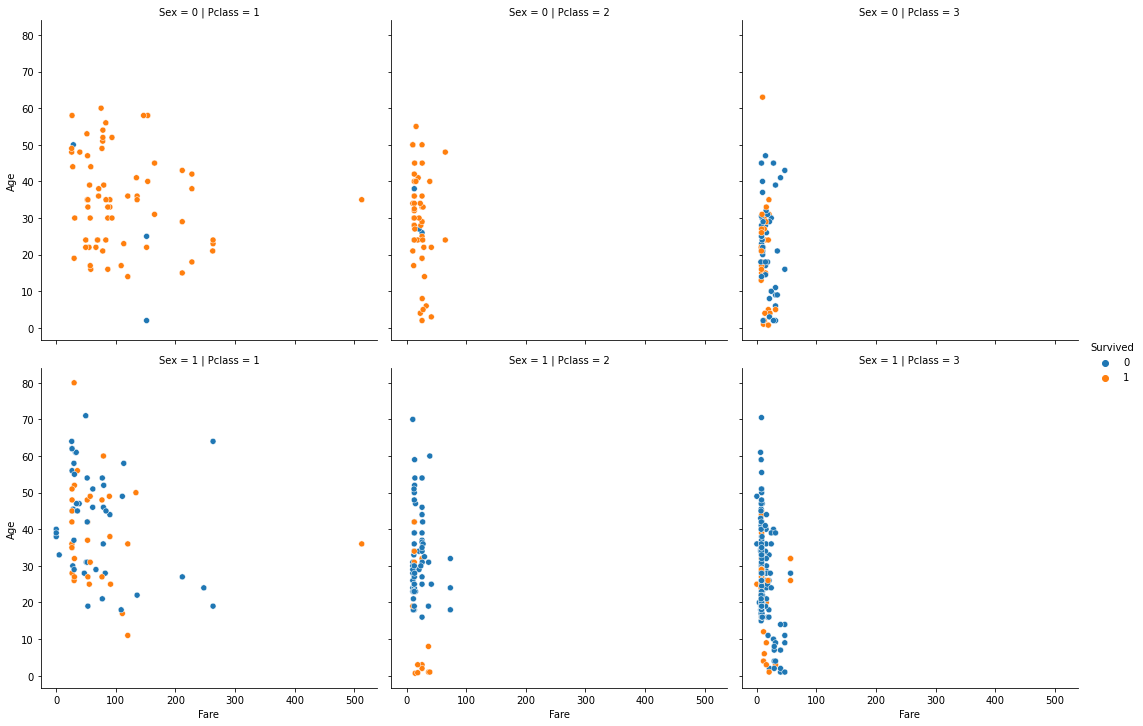

In [18]:
sns.relplot(data=train, x="Fare", y="Age", hue="Survived", col="Pclass", row="Sex")
plt.show()

We can see that female passengers from the 1st and 2nd classes have high chances of surviving, while also young, male passengers from the 2nd class lived as well

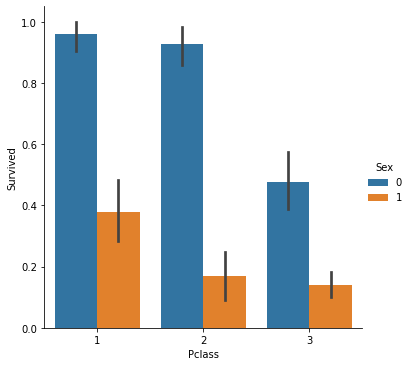

In [19]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=train)
plt.show()

As seen in the above graph, we can see that female passengers of the 2nd class are very likely to survive, while 2nd class men arent likely to livesns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=train)
plt.show()

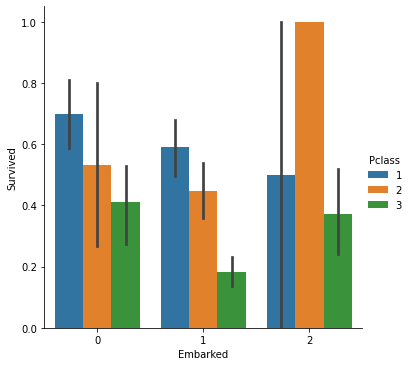

In [20]:
sns.catplot(x="Embarked", y="Survived", hue="Pclass", kind="bar", data=train)
plt.show()

From the above graph we can see that passengers for whom Embarked in Queenstown and are from the 2nd class have very high chances of surviving. \
Lets isolate them with another feature:
* Mid_Class_Q - (Middle class passenger from Queenstown) 

## Feature engineering - part 1
1) lets keep the age, we turn the age into a categorical feature as follows:
* unknown age
* child/baby - age 0-12
* teenager - age 12-20
* young adult - 21-30
* adult - 30-55
* senior/old ppl - 55+
2) we'll make the fare a categorical feature as well:
* Fare>100
* 50<Fare<100
* 25<Fare<50
* 0<Fare<25
* Fare==0
3) Family size:
* Family_size = SibSp+Parch
4) Single:
* we want to have a feature that marks single people since they survive more often.
5) Lot_Sib - (=Lots of siblings) 
* SibSp>=2
6) Lot_Child - (=Lots of children) 
* Parch >= 4
7) Big_Fam - (=Big family) 
* Fam_Size >= 4
8) Mid_Class_Q - (Middle class passenger from Queenstown)
*  Pclass==2 and Embarked==2
9) Title:
* need to extract title out of name and think how to tokenize it.

In [21]:
# 1. Age
X_train["Age"].fillna(-1, inplace=True) #unknown age = -1
category = pd.cut(X_train.Age, bins=[-1,0,2,17,30,65,100],labels=['Unknown','Toddler/baby', 'Child', 'Young_adult' ,'Adult', 'Elderly'])
X_train.insert(5,'Age_Group',category)
X_train = pd.get_dummies(data=X_train, columns=["Age_Group"], dummy_na=True)
X_train = X_train.drop(["Age"], axis=1)

In [22]:
# 2. Fare
category = pd.cut(X_train.Fare, bins=[0,0.5,25,50,100,1000],labels=[0,1,2,3,4])
X_train.insert(6,'Fare_Category',category)
X_train = pd.get_dummies(data=X_train, columns=["Fare_Category"])
X_train = X_train.drop(["Fare"], axis=1)

In [23]:
# 3. Family-Size
X_train["Family_Size"] = X_train["Parch"] + X_train["SibSp"]

In [24]:
# 4. Single
X_train["Single"] = np.logical_and(X_train["Parch"]==0, X_train["SibSp"]==0).astype(int)

In [25]:
# 5. Lot_Sib
X_train["Lot_Sib"] = (X_train["SibSp"] >= 2).astype(int)

In [26]:
# 6. Lot_Child
X_train["Lot_Child"] = (X_train["Parch"] >= 4).astype(int)

In [27]:
# 7. Big_Fam
X_train["Big_Fam"] = (X_train["Family_Size"] >= 4).astype(int)

In [28]:
# 8. Mid_Class_Q 
X_train["Mid_Class_Q"] = np.logical_and(X_train["Pclass"]==2 , X_train["Embarked"]==2).astype(int)

In [29]:
# 9. Title 
import re


extract_title = lambda x: re.split("\.",re.split(",",x)[1])[0]
X_train["Title"] = X_train["Name"].apply(extract_title)
X_train.drop(["Name"], axis=1, inplace=True)

In [30]:
X_train = pd.get_dummies(data=X_train, columns=["Embarked", "Title"])

In [31]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Age_Group_Unknown,Age_Group_Toddler/baby,Age_Group_Child,Age_Group_Young_adult,Age_Group_Adult,Age_Group_Elderly,...,Title_ Master,Title_ Miss,Title_ Mlle,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0,0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,0,8,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Feature Selection
Sadly we'll have to say goodbye to some of our pretty features.

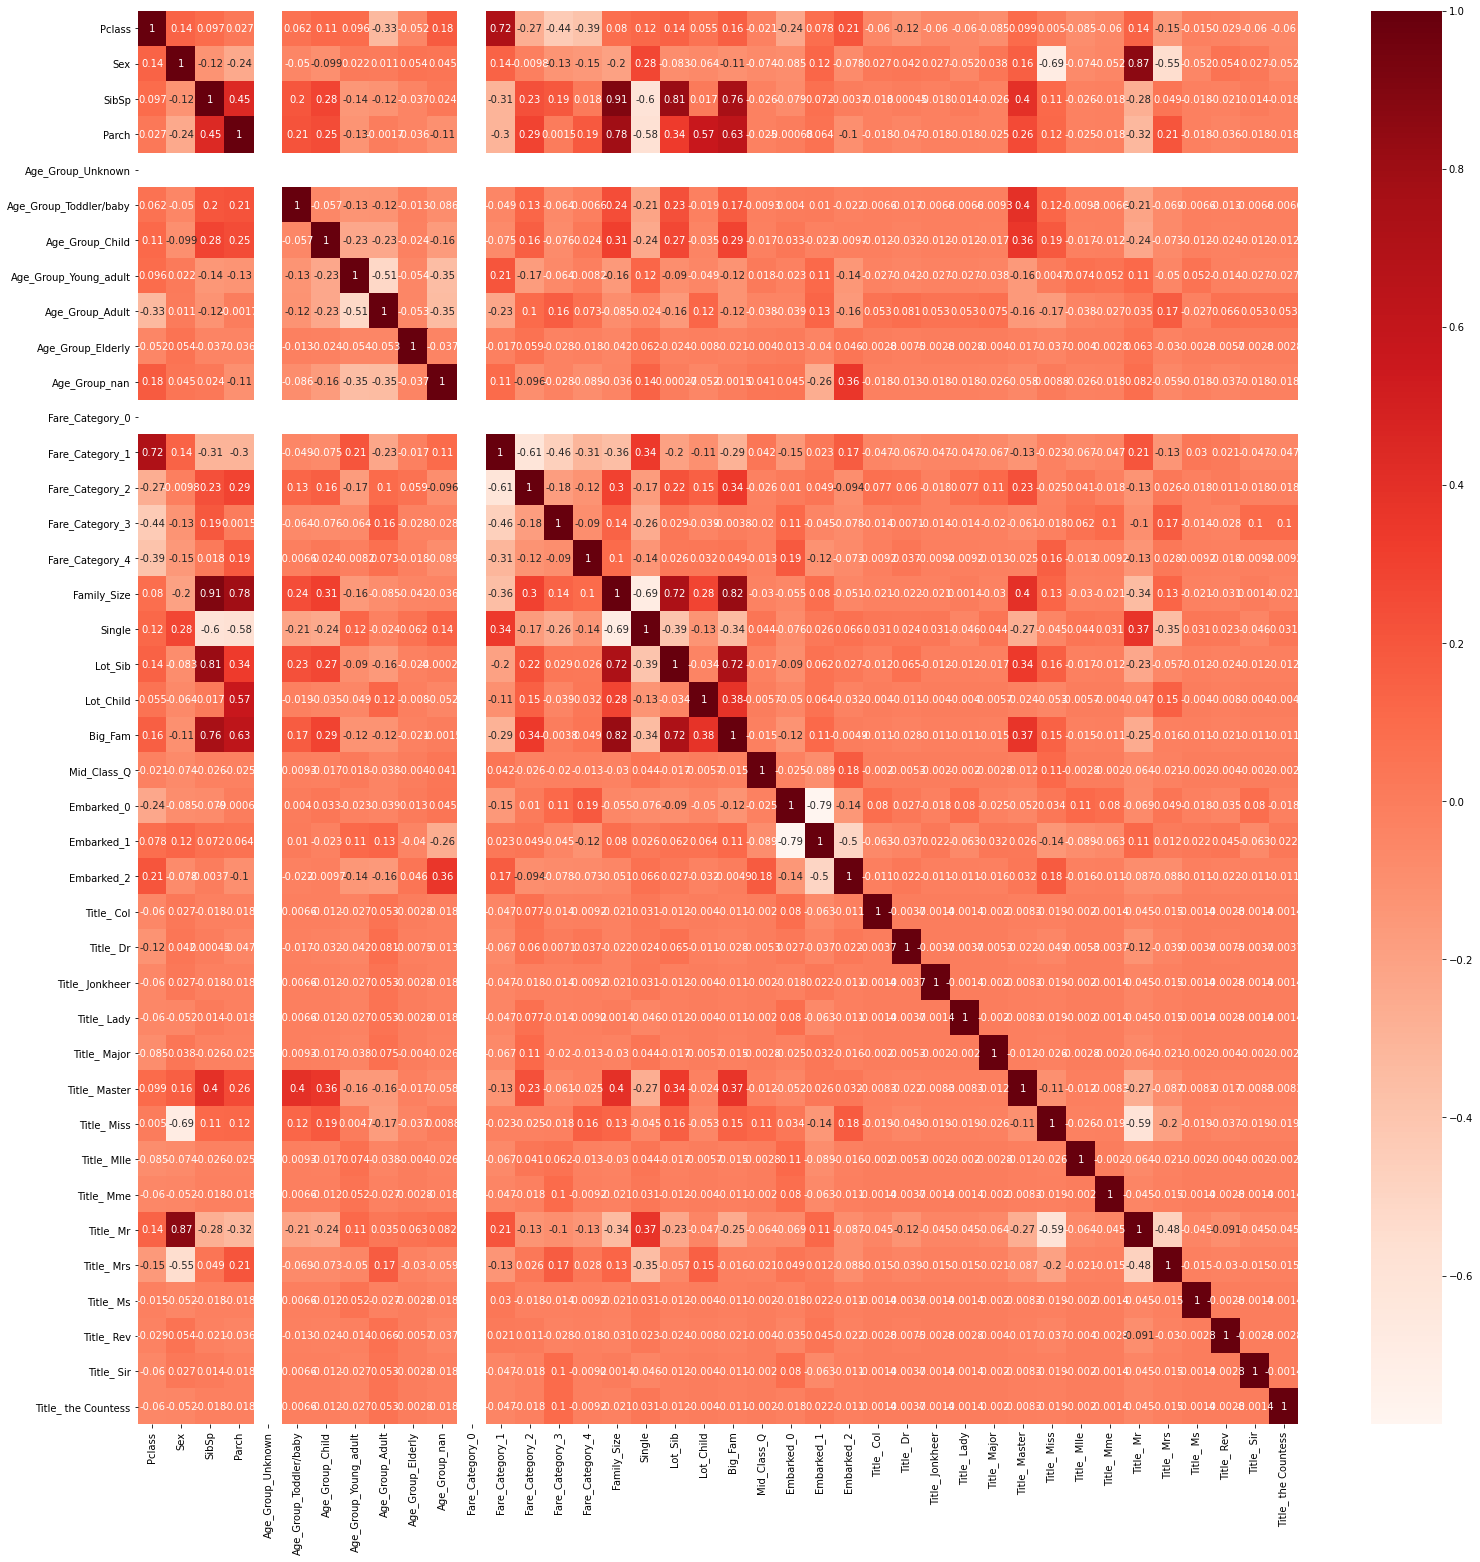

In [32]:
from sklearn.feature_selection import f_classif, SelectKBest


plt.figure(figsize=(26,26))
cor = X_train.corr()
#cor = f_classif(X_train,X_train)
ax = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Pearson's correlation may not best fit the scenario of having categorical and contingous data in the same table, but is simple to deploy. \
As seen in the above table, the following couples have high correlation (in sorted order): \
{(Fare, Pclass),(Parch,SibSp),(Age,Pclass),(SibSp, Age),(Fare,Embarked),(Pclass,Embarked),(Sex,Parch),(Sex,Fare)} \
 \
 We'll keep them all for now since we dont have many features, but we might get back to this later on.

In [33]:
# from sklearn.feature_selection import SelectKBest, chi2, f_classif
# selector = SelectKBest(score_func=f_classif,k=15).fit(X_train,y_train)
# cols = selector.get_support(indices=True)
# X_train = X_train.iloc[:,cols]
# X_train.head()


### Splitting Data

now we need to make sure we use a validation batch for model selection

In [34]:
from sklearn.model_selection import train_test_split

X_test_set = X_test.copy()
y_test_set = y_test.copy()

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

## Simple Classifiers
first we normalize contingous features.

In [35]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train.loc[:,("Family_Size","SibSp","Parch","Pclass")])

X_train.loc[:,("Family_Size","SibSp","Parch","Pclass")] = scaler.transform(X_train.loc[:,("Family_Size","SibSp","Parch","Pclass")], copy=False)
X_test.loc[:,("Family_Size","SibSp","Parch","Pclass")] = scaler.transform(X_test.loc[:,("Family_Size","SibSp","Parch","Pclass")], copy=False)
X_train.head()

,Pclass,Sex,SibSp,Parch,Age_Group_Unknown,Age_Group_Toddler/baby,Age_Group_Child,Age_Group_Young_adult,Age_Group_Adult,Age_Group_Elderly,...,Title_ Master,Title_ Miss,Title_ Mlle,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess
23,0.815408,0,-0.494293,-0.449416,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
300,0.815408,1,0.330081,0.771129,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
208,-0.380043,1,-0.494293,-0.449416,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
331,-1.575494,1,-0.494293,-0.449416,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
587,-0.380043,1,-0.494293,-0.449416,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Great \
Lets train some classifiers in order to get a grasp!now we need to make sure we use a validation batch for model selection

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

clf = LogisticRegression()
selector = RFECV(clf, min_features_to_select=12, scoring="balanced_accuracy")
selector.fit(X_train, y_train)
cols = selector.get_support(indices=True)
X_train = X_train.iloc[:,cols]
X_test = X_test.iloc[:,cols]
X_train.head()

,Pclass,Sex,SibSp,Age_Group_Child,Fare_Category_3,Lot_Sib,Lot_Child,Big_Fam,Embarked_1,Title_ Master,Title_ Mr,Title_ Mrs,Title_ Rev
23,0.815408,0,-0.494293,0,0,0,0,0,1,0,0,0,0
300,0.815408,1,0.330081,0,0,0,0,0,0,0,1,0,0
208,-0.380043,1,-0.494293,0,0,0,0,0,1,0,1,0,0
331,-1.575494,1,-0.494293,0,0,0,0,0,1,0,1,0,0
587,-0.380043,1,-0.494293,0,0,0,0,0,1,0,1,0,0


In [37]:
import scipy.stats as stats
from sklearn.metrics import plot_confusion_matrix, f1_score, balanced_accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Logistic Regression

train score: 0.811
test score: 0.801


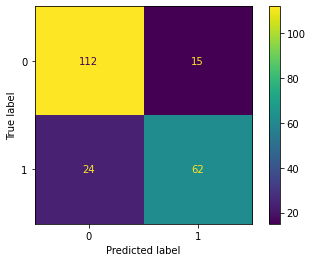

{'Cs': 100,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': [0.9146605067097656,
  0.8664332372748527,
  0.42042388127243824,
  0.6889026501810949,
  0.26179282863783415,
  0.4017321141971656,
  0.7464528791440445,
  0.29385307008703154,
  0.24395462798651413,
  0.4799126082821178,
  0.11258525877530379,
  0.6565131583605216,
  0.4221042078100208,
  0.15724011864055276,
  0.08474435516477452,
  0.6837901310658233,
  0.5180317128627703,
  0.4243929095546619,
  0.7684964157422561,
  0.38705822289255143,
  0.4180304910142594,
  0.4897981749601973,
  0.24093386018083207,
  0.2358362668112105,
  0.15081299035698592,
  0.37013086237147497,
  0.7738336901307608,
  0.9620537654075872,
  0.27286737955634843,
  0.05150551109329482,
  0.8917971202353427,
  0.9555761418710578,
  0.7305457819787963,
  0.05912633596621786,
  0.7327165278350606,
  0.7345248836320376,
  0.9705448883949983,
  0.5489838267283258,
  0.4025489244597924,
  0

In [39]:
# Linear models first!
from sklearn.linear_model import LogisticRegressionCV


# Applying grid search with randomalized l1_ratios so that it is actualy an implementation of a random search
l1_ratios_list = list(stats.uniform(0,1).rvs(100))
log_reg_optimized = LogisticRegressionCV(Cs=100, penalty='elasticnet',solver='saga', cv=5, l1_ratios=l1_ratios_list,
                                         scoring='balanced_accuracy', max_iter=50000, multi_class='ovr')

log_reg_optimized.fit(X_train, y_train)

train_score = log_reg_optimized.score(X_train, y_train)
print(f"train score: {train_score:.3f}")

test_score = log_reg_optimized.score(X_test, y_test)
print(f"test score: {test_score:.3f}")
plot_confusion_matrix(log_reg_optimized,X_test, y_test)
plt.show()
log_reg_optimized.get_params()

### KNN

train score: 0.822
validation score: 0.784
test f1 score: 0.742
test accuracy score: 0.808


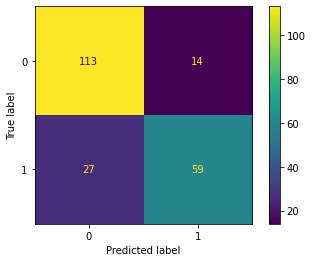

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# parameters for later doing parameter tuning via grid-search, since exhastive random search is irrelevant here.
parameters = {
              'n_neighbors':np.arange(1,12), 
              'p':np.arange(1,6), 
              'weights':['uniform','distance']
             }

knn_clf = KNeighborsClassifier()

knn_clf_optimized = GridSearchCV(knn_clf, parameters, return_train_score=True, scoring='balanced_accuracy')
knn_clf_optimized.fit(X_train, y_train)

train_score = balanced_accuracy_score(knn_clf_optimized.predict(X_train), y_train)
print(f"train score: {train_score:.3f}")

print(f"validation score: {knn_clf_optimized.best_score_:.3f}")

test_score = f1_score(knn_clf_optimized.predict(X_test),y_test)
print(f"test f1 score: {test_score:.3f}")
print(f"test accuracy score: {balanced_accuracy_score(knn_clf_optimized.predict(X_test), y_test):.3f}")

plot_confusion_matrix(knn_clf_optimized,X_test, y_test)
plt.show()

### SVM

train score: 0.824
validation score: 0.811
test f1 score: 0.752
test accuracy score: 0.803


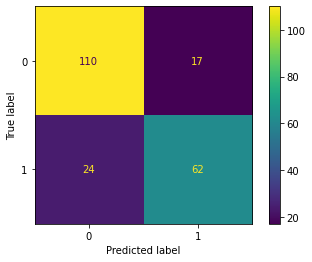

In [41]:
from sklearn.svm import SVC


# parameters for later doing parameter tuning through a grid-search
parameters = {
              'gamma':["scale","auto"],
              'class_weight':[None,"balanced"], 
              'C':stats.expon(),
              'kernel':['poly','rbf'], 
              'degree':[1,2,3,4,5],
              'decision_function_shape':['ovo']
        
             }

svm_clf = SVC()

svm_clf_optimized = RandomizedSearchCV(svm_clf, param_distributions=parameters, n_iter=10000, scoring='balanced_accuracy',return_train_score=True)
svm_clf_optimized.fit(X_train, y_train)

train_score = balanced_accuracy_score(svm_clf_optimized.predict(X_train), y_train)
print(f"train score: {train_score:.3f}")

print(f"validation score: {svm_clf_optimized.best_score_:.3f}")

test_score = f1_score(svm_clf_optimized.predict(X_test), y_test)
print(f"test f1 score: {test_score:.3f}")
print(f"test accuracy score: {balanced_accuracy_score(svm_clf_optimized.predict(X_test), y_test):.3f}")

plot_confusion_matrix(svm_clf_optimized, X_test, y_test)
plt.show()

### MLP

train score: 0.839
validation score: 0.816
test f1 score: 0.723
test accuracy score: 0.802


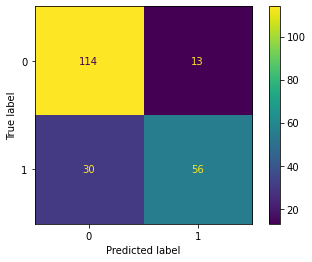

In [42]:
from sklearn.neural_network import MLPClassifier


parameters = {'solver':['adam','lbfgs'], 
              'alpha': stats.expon(),
              'hidden_layer_sizes':[(x,) for x in np.arange(20,60)],
              'learning_rate_init': stats.uniform(0,1),
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
              'learning_rate_init': stats.uniform(0,1),
              'max_iter':[30000],
              'momentum': stats.uniform(0,1),
              'nesterovs_momentum': [True, False]
             }

mlp_clf = MLPClassifier()

mlp_clf_optimized = RandomizedSearchCV(mlp_clf, param_distributions=parameters, n_iter=10000, scoring='balanced_accuracy',return_train_score=True)
mlp_clf_optimized.fit(X_train, y_train)

train_score = balanced_accuracy_score(mlp_clf_optimized.predict(X_train), y_train)
print(f"train score: {train_score:.3f}")

print(f"validation score: {mlp_clf_optimized.best_score_:.3f}")

test_score = f1_score(mlp_clf_optimized.predict(X_test), y_test)
print(f"test f1 score: {test_score:.3f}")
print(f"test accuracy score: {balanced_accuracy_score(mlp_clf_optimized.predict(X_test), y_test):.3f}")

plot_confusion_matrix(mlp_clf_optimized, X_test, y_test)
plt.show()

### Decision-Trees
"Trees have one aspect that prevents them from being the ideal tool for predictive learning, namely inaccuracy." - The Elements of Statistical Learning

train score: 0.836
validation score: 0.807
test f1 score: 0.758
test accuracy score: 0.837


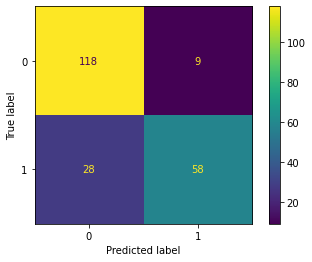

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


clf = DecisionTreeClassifier()
alphas = list(clf.cost_complexity_pruning_path(X_train, y_train).ccp_alphas)
alphas.append(0)

parameters = {'ccp_alpha':alphas,
             'max_features':['auto', 'sqrt', "log2"],
             'class_weight':['balanced',None],
              'min_samples_leaf':list(np.arange(1,13)),
              'max_depth': [3,4,5,6,7,8,9,10]                               
             }
optimized_dt = GridSearchCV(clf, parameters,scoring='balanced_accuracy')
optimized_dt.fit(X_train, y_train)

train_score = balanced_accuracy_score(optimized_dt.predict(X_train), y_train)
print(f"train score: {train_score:.3f}")

print(f"validation score: {optimized_dt.best_score_:.3f}")

test_score = f1_score(optimized_dt.predict(X_test), y_test)
print(f"test f1 score: {test_score:.3f}")
print(f"test accuracy score: {balanced_accuracy_score(optimized_dt.predict(X_test), y_test):.3f}")

plot_confusion_matrix(optimized_dt, X_test, y_test)
plt.show()

DecisionTreeClassifier(ccp_alpha=0.0007984414423046222, max_depth=5,
                       max_features='log2')

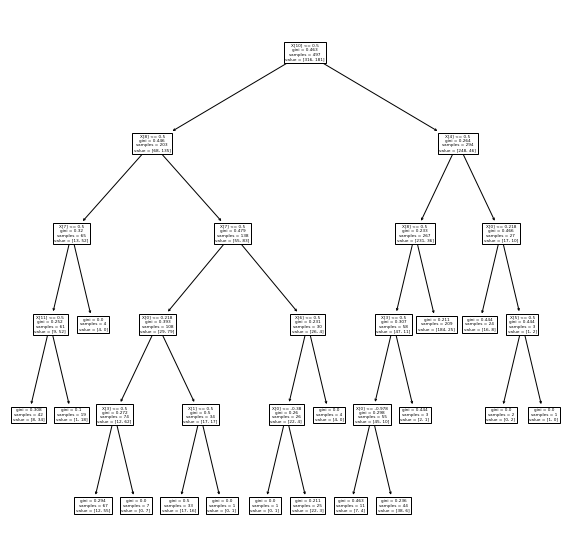

In [44]:
plt.figure(figsize=(10,10))
plot_tree(optimized_dt.best_estimator_)
optimized_dt.best_estimator_

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time


rf_clf = RandomForestClassifier(n_estimators=1000,oob_score=True,n_jobs=-1)

parameters = {'ccp_alpha':alphas,
              'max_depth':list(np.arange(3,15)),
              'min_samples_leaf': [2,3,4,5,6,7,8],
              'max_features': ['auto','sqrt', 'log2'],
              'class_weight':['balanced', 'balanced_subsample',None]              
              }

# we do grid search and not randomized search since the grid is not too large

#################
start = time.time()
#####################
optimized_rf = GridSearchCV(rf_clf, parameters,scoring='balanced_accuracy')

optimized_rf.fit(X_train, y_train)

train_score = balanced_accuracy_score(optimized_rf.predict(X_train), y_train)
print(f"train score: {train_score:.3f}")

print(f"out-of-bag score: {optimized_rf.best_estimator_.oob_score_:.3f}")

test_score = f1_score(optimized_rf.predict(X_test), y_test)
print(f"test f1 score: {test_score:.3f}")
print(f"test accuracy score: {balanced_accuracy_score(optimized_rf.predict(X_test), y_test):.3f}")

plot_confusion_matrix(optimized_rf, X_test, y_test)
plt.show()

end = time.time()
print("it took: ", end - start)

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


parameters = {
          'learning_rate' : stats.uniform(0,4),
          'n_estimators':np.arange(100,1000)
        }
param_comb = 10000

adaboost_clf = AdaBoostClassifier()
optimized_adaboost_clf = RandomizedSearchCV(adaboost_clf, param_distributions=parameters, n_iter=param_comb, scoring='balanced_accuracy', n_jobs=-1)
optimized_adaboost_clf.fit(X_train, y_train)


train_score = balanced_accuracy_score(optimized_adaboost_clf.predict(X_train), y_train)
print(f"train score: {train_score:.3f}")

print(f"validation score: {optimized_adaboost_clf.best_score_:.3f}")

test_score = f1_score(optimized_adaboost_clf.predict(X_test), y_test)
print(f"test f1 score: {test_score:.3f}")
print(f"test accuracy score: {balanced_accuracy_score(optimized_adaboost_clf.predict(X_test), y_test):.3f}")

plot_confusion_matrix(optimized_adaboost_clf, X_test, y_test)
plt.show()

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


parameters = {
                'learning_rate':stats.uniform(0,1), 
                'subsample': stats.uniform(0,1),
                'ccp_alpha':alphas,
                'max_depth': [3, 4, 5, 6],
                'n_estimators':list(np.arange(100,1000)),
                'min_samples_leaf':[1,2,3,4,5]
}

param_comb = 10000

gboost_clf = GradientBoostingClassifier()
optimized_gboost_clf = RandomizedSearchCV(gboost_clf, param_distributions=parameters, n_iter=param_comb, scoring='balanced_accuracy', n_jobs=4, verbose=3)
optimized_gboost_clf.fit(X_train, y_train)


train_score = balanced_accuracy_score(optimized_gboost_clf.predict(X_train), y_train)
print(f"train score: {train_score:.3f}")

print(f"validation score: {optimized_gboost_clf.best_score_:.3f}")

test_score = f1_score(optimized_gboost_clf.predict(X_test), y_test)
print(f"test f1 score: {test_score:.3f}")
print(f"test accuracy score: {balanced_accuracy_score(optimized_gboost_clf.predict(X_test), y_test):.3f}")

plot_confusion_matrix(optimized_gboost_clf, X_test, y_test)
plt.show()

In [ ]:
# res = pd.DataFrame(optimized_gboost_clf.cv_results_)
# res[res["mean_test_score"]>0.78]

### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


xgb_clf = XGBClassifier(objective='binary:logistic',use_label_encoder=False)
params = {
          'eta' : stats.uniform(0,1),
          'ccp_alpha':alphas,
          'min_child_weight': [1, 2, 3, 4, 5],
          'gamma': stats.uniform(0,2),
          'subsample': stats.uniform(0,1),
          'colsample_bytree': stats.uniform(0,1),
          'max_depth': [3, 4, 5, 6],
          'n_estimators':list(np.arange(100,1000))
        }
param_comb = 10000

optimized_xgboost_clf = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=param_comb, scoring='balanced_accuracy', n_jobs=4, verbose=3)
optimized_xgboost_clf.fit(X_train, y_train)

train_score = balanced_accuracy_score(optimized_xgboost_clf.predict(X_train), y_train)
print(f"train score: {train_score:.3f}")

print(f"validation score: {optimized_xgboost_clf.best_score_:.3f}")

test_score = f1_score(optimized_xgboost_clf.predict(X_test), y_test)
print(f"test f1 score: {test_score:.3f}")
print(f"test accuracy score: {balanced_accuracy_score(optimized_xgboost_clf.predict(X_test), y_test):.3f}")

plot_confusion_matrix(optimized_xgboost_clf, X_test, y_test)
plt.show()

In [ ]:
# res = pd.DataFrame(optimized_xgboost_clf.cv_results_)
# res[res["mean_test_score"]>0.78]